# 讀檔

(90, 180, 3)


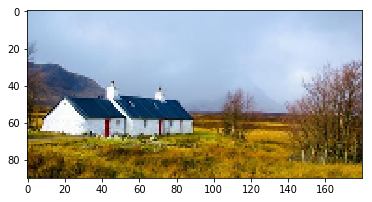

In [39]:
import numpy as np
import pandas as pd
import math
from numpy.linalg import inv
from matplotlib import pyplot as plt
import cv2
import random
img = cv2.imread('HW3.jpg')
height=90
width=180
img = cv2.resize(img, (width, height), interpolation=cv2.INTER_CUBIC)
img_rgb = img[:,:,::-1]
print( img_rgb.shape )
plt.imshow(img_rgb)
plt.show()


# K-means 參數 函數

In [40]:
def cal_dis(x1,y1,z1,x2,y2,z2):
    return ((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)**0.5
f = open('A.txt', 'w', encoding = 'UTF-8')
k=5
kmeans_iteration=10
uk=np.ones((k,3))
rnk=np.zeros((height,width))
for i in range(k):
    for j in range(3):
        uk[i][j]=random.randint(0,256)            

# K-means

iteration: 0 , E step
iteration: 0 , M step
u 0 :    238.71569899448588   212.3266299059358   191.29743756081737
u 1 :    31.132458233890215   98.86651892260484   126.41561541084214
u 2 :    56.12020460358056   46.566496163682864   36.783248081841435
u 3 :    221.35959271168275   190.97481243301178   166.0278670953912
u 4 :    184.0379403794038   160.32926829268294   150.1680216802168


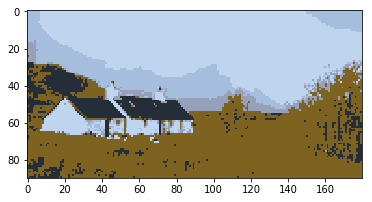

iteration: 1 , E step
iteration: 1 , M step
u 0 :    240.73141314131414   213.86588658865887   192.7069306930693
u 1 :    22.579228243021348   101.58990147783251   132.683908045977
u 2 :    51.8105167724388   51.62692656391659   47.91749773345422
u 3 :    221.22947615324472   192.25332290852228   168.25097732603598
u 4 :    162.26461843409317   146.70465807730426   144.93557978196233


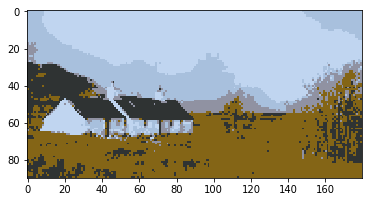

iteration: 2 , E step
iteration: 2 , M step
u 0 :    241.1050168476226   214.30063646574317   193.27648820666417
u 1 :    18.254079254079254   104.75874125874125   137.34149184149183
u 2 :    48.42972041363462   53.70011489850632   54.38912294140176
u 3 :    220.53691731881594   191.89758421231713   168.5427015991834
u 4 :    147.6345776031434   135.81728880157172   137.74066797642436


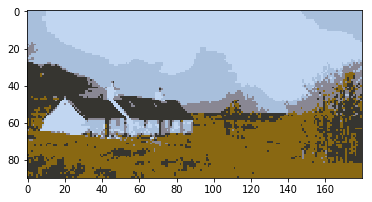

iteration: 3 , E step
iteration: 3 , M step
u 0 :    241.13343328335833   214.31296851574214   193.27717391304347
u 1 :    16.298133469700844   107.4479672717975   140.78240859115317
u 2 :    44.87147335423197   54.71264367816092   58.28700801114594
u 3 :    219.4988475469213   191.16035561409285   168.25913730655253
u 4 :    139.06124401913877   129.40861244019138   132.9980861244019


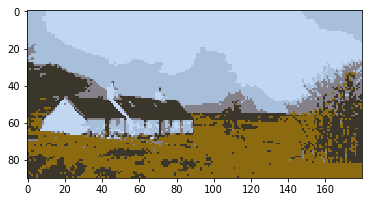

iteration: 4 , E step
iteration: 4 , M step
u 0 :    241.0435024065161   214.1851166234728   193.08182154757498
u 1 :    15.335239651416122   109.37636165577342   143.1644880174292
u 2 :    42.24370860927152   55.29304635761589   60.52814569536424
u 3 :    218.08692810457515   189.9950980392157   167.6921568627451
u 4 :    131.7810707456979   123.93977055449331   128.67495219885276


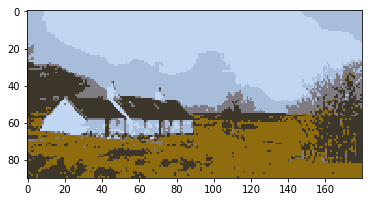

iteration: 5 , E step
iteration: 5 , M step
u 0 :    240.95126419934041   214.07237083180652   192.92671308171492
u 1 :    14.820447465307279   110.51656754460492   144.64146134239593
u 2 :    40.3242542153048   55.525940337224384   61.650453955901426
u 3 :    217.0620509470934   189.1309601567603   167.19790986283473
u 4 :    126.52206572769953   119.87511737089201   125.29765258215963


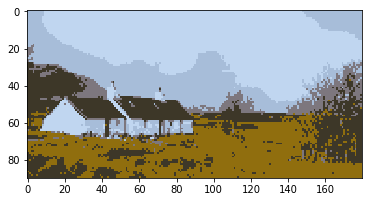

iteration: 6 , E step
iteration: 6 , M step
u 0 :    240.77472626099444   213.8413211272662   192.59935379644588
u 1 :    14.570106967331599   111.14570685169124   145.43914426134722
u 2 :    39.139309900032245   55.537568526281845   62.107707191228634
u 3 :    215.8532754010695   188.11463903743316   166.6139705882353
u 4 :    122.78087279480037   116.84772516248839   122.66016713091922


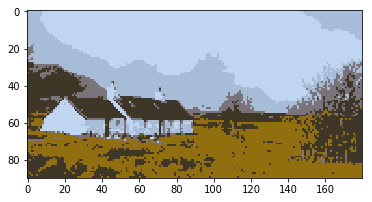

iteration: 7 , E step
iteration: 7 , M step
u 0 :    240.69761225944404   213.75498930862437   192.49002138275125
u 1 :    14.548594847775176   111.62470725995315   145.93530444964873
u 2 :    37.94867656552615   55.43318269851517   62.47740477727566
u 3 :    215.05018400802945   187.48678487788558   166.2576112412178
u 4 :    120.13824884792626   113.95023041474654   119.8036866359447


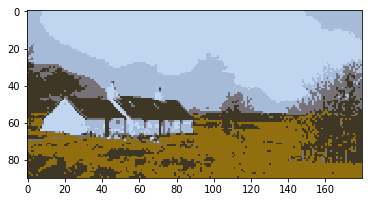

iteration: 8 , E step
iteration: 8 , M step
u 0 :    240.54335260115607   213.55246102644946   192.19898406025573
u 1 :    14.568679692125517   112.0704558910598   146.44849023090586
u 2 :    36.816121722240204   55.351893816769184   62.71285205568145
u 3 :    213.9910928400137   186.7077766358342   165.86330935251797
u 4 :    117.96651583710407   111.25972850678733   117.1158371040724


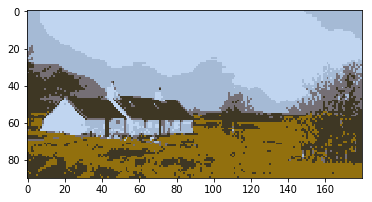

iteration: 9 , E step
iteration: 9 , M step
u 0 :    240.4928521617852   213.49459553695957   192.1223849372385
u 1 :    14.568662496276437   112.31754542746499   146.75215966636878
u 2 :    36.04747967479675   55.28585365853659   62.81333333333333
u 3 :    213.33481836874572   186.2731322823852   165.69533927347499
u 4 :    116.21364452423698   109.03500897666068   114.85098743267504


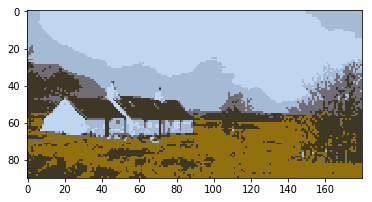

In [41]:
for iteration in range(kmeans_iteration):
    print("iteration:",iteration,", E step")
    for i in range(height):
        for j in range(width):
            min_uk=-1
            min_dis=1000000000
            for m in range(k):
                distance=cal_dis(img[i][j][0],img[i][j][1],img[i][j][2], uk[m][0], uk[m][1], uk[m][2])
                if distance<min_dis:
                    min_dis=distance
                    min_uk=m
            rnk[i][j]=min_uk
           ## print("rnk[",i,"][",j,"]=",min_uk)
    print("iteration:",iteration,", M step")
    for i in range(k):
        counter0=counter1=counter2=num=0
        for m in range(height):
            for n in range(width):
                if rnk[m][n]==i:
                    counter0=counter0+img[m][n][0]
                    counter1=counter1+img[m][n][1]
                    counter2=counter2+img[m][n][2]
                    num=num+1
        if num==0:
            print("u",i,": ")
            uk[i][0]=random.randint(0,256)    
            uk[i][1]=random.randint(0,256)    
            uk[i][2]=random.randint(0,256)    
        if num!=0:
            print("u",i,": "," ",counter0/num," ",counter1/num," ",counter2/num)
            uk[i][0]=counter0/num
            uk[i][1]=counter1/num
            uk[i][2]=counter2/num
            
    img_rgbtemp=np.zeros((height,width,3))
    for i in range(height):
        for j in range(width):
            group=int(rnk[i][j])
            img_rgbtemp[i][j][0]=int ( uk[ group  ][0] )
            img_rgbtemp[i][j][1]=int ( uk[ group  ][1] )
            img_rgbtemp[i][j][2]=int ( uk[ group  ][2] )
    img_rgbtemp2 = img_rgbtemp.astype(np.int32)
    img_rgb  = img_rgbtemp2[:,:,::-1]
    img_rgb2 = img[:,:,::-1]
    plt.imshow(img_rgb)
    plt.show()

# GMM

In [42]:
def gaussian(mean,var,x,D):
    leftterm_Denominator=( ((2*math.pi)**D)*np.linalg.det(var) )**0.5
    rightterm_power=-0.5*(  ((x-mean).T).dot(  np.linalg.pinv(var)  ).dot((x-mean))  )
    #print(leftterm_Denominator)
    #print(rightterm_power)
    return (1.0/leftterm_Denominator*np.exp(rightterm_power) )

D=3
GMM_iteration=100

responsibility=np.zeros((height,width,k))
variance=np.zeros((k,D,D))
for i in range(k):
    variance[i]=128*np.eye(D, dtype = 'int')
latent_var=np.zeros((k))
for i in range(height):
    for j in range(width):
        latent_var  [int(rnk[i][j]) ] =latent_var[ int(rnk[i][j]) ]+1
sum_temp=0
sum_temp2=0
for m in range(k):
    sum_temp=sum_temp+latent_var[m]
#print(sum_temp)
for m in range(k):
    latent_var[m]=latent_var[m]/sum_temp
    sum_temp2=sum_temp2+latent_var[m]
    #print(latent_var[m],sum_temp2)
        

第 0 次 E_step:update resposibility
第 0 次 M_step
log_likely: -262288.6147090851
第 1 次 E_step:update resposibility
第 1 次 M_step
log_likely: -262149.8748390963
第 2 次 E_step:update resposibility
第 2 次 M_step
log_likely: -262045.10416671846
第 3 次 E_step:update resposibility
第 3 次 M_step
log_likely: -261961.7711201693
第 4 次 E_step:update resposibility
第 4 次 M_step
log_likely: -261896.18430443664
第 5 次 E_step:update resposibility
第 5 次 M_step
log_likely: -261841.09002478872
第 6 次 E_step:update resposibility
第 6 次 M_step
log_likely: -261791.0293731413
第 7 次 E_step:update resposibility
第 7 次 M_step
log_likely: -261744.11824146725
第 8 次 E_step:update resposibility
第 8 次 M_step
log_likely: -261702.35845753393
第 9 次 E_step:update resposibility
第 9 次 M_step
log_likely: -261668.63552882045
第 10 次 E_step:update resposibility
第 10 次 M_step
log_likely: -261642.3665049245
第 11 次 E_step:update resposibility
第 11 次 M_step
log_likely: -261621.84162520175
第 12 次 E_step:update resposibility
第 12 次 M_step
log_

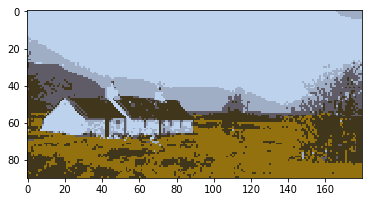

In [43]:
log_likelyhood=np.zeros((100))
for iteraion in range(GMM_iteration):
    print("第",iteraion,"次 E_step:update resposibility")
    for i in range(height):
        #print("process column:",i)
        for j in range(width):
            res_denomi=0
            for m in range(k):
                #print("debug:",uk[m]," ",img[i][j])
                #print("mode1:",latent_var[m]," ",gaussian(uk[m],variance[m],img[i][j],3))
                res_denomi=res_denomi+latent_var[m]*  gaussian(uk[m],variance[m],img[i][j],3)
            for m in range(k):
                #print("mode2,",m," ",latent_var[m]," ", gaussian(uk[m],variance[m],img[i][j],3)," ",res_denomi)
                responsibility[i][j][m]=latent_var[m]*  gaussian(uk[m],variance[m],img[i][j],3) / res_denomi
                #if((i+1)%20==0):
                    #print(i+1,"responsibility,",i,j,m," ", responsibility[i][j][m])
                
    print("第",iteraion,"次 M_step")
    #print("                        update NK")
    NK=np.zeros((k)) 
    for m in range(k):
        for i in range(height):
            for j in range(width):
                  NK[m]= NK[m]+responsibility[i][j][m]
    #for m in range(k):
          #print( "NK",m,":",NK[m])
                        
    #print("\n","                        update mean")
    for m in range(k):
        #print("process u ",m)
        uk[m][0]=uk[m][1]=uk[m][2]=0
        for i in range(height):
            for j in range(width):
                uk[m][0]=uk[m][0]+responsibility[i][j][m]*img[i][j][0]
                uk[m][1]=uk[m][1]+responsibility[i][j][m]*img[i][j][1]
                uk[m][2]=uk[m][2]+responsibility[i][j][m]*img[i][j][2]
        if NK[m]!=0:
            uk[m]=uk[m]/NK[m]
        else:
            uk[m][0]=random.randint(0,256)
            uk[m][1]=random.randint(0,256)  
            uk[m][2]=random.randint(0,256)  
                
    #print("                        update var ")
    for m in range(k):
        #print("process var ",m)
        var_temp=np.zeros((3,3))
        for i in range(height):
            for j in range(width):
                var_temp=var_temp+responsibility[i][j][m]*( (img[i][j]-uk[m]).T.dot((img[i][j]-uk[m])) )
        var_temp=var_temp/NK[m]
                
    
    #print("                        update latent")   
    for m in range(k):
        latent_var[m]=NK[m]/(width*height)
        
        
    log_likely=0
    for i in range(height):
        for j in range(width):
            temp_value=0
            for m in range(k):
                temp_value=temp_value+latent_var[m]*gaussian(uk[m],variance[m],img[i][j],3)
            log_likely=log_likely+math.log(temp_value)
    
    log_likelyhood[iteraion]=log_likely
    print("log_likely:",log_likely)
    
img_GMM=np.zeros((height,width,3))
for i in range(height):
    for j in range(width):
        max_class=-1
        max_respon=-1
        for m in range(k):
            if responsibility[i][j][m]>max_respon:
                max_class=m
                max_respon=responsibility[i][j][m]
        img_GMM[i][j]=uk[max_class]
img_GMM = img_GMM.astype(np.int32)
img_GMM  = img_GMM[:,:,::-1]
print( img_GMM.shape )
plt.imshow(img_GMM)
plt.show()







# show curve

No handles with labels found to put in legend.


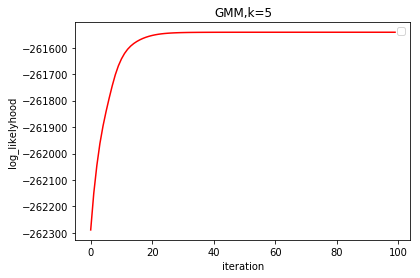

In [45]:
x_temp=np.linspace(0,99,100)
plt.plot(x_temp,log_likelyhood,  color='red')
plt.xlabel('iteration')
plt.ylabel('log_likelyhood')
plt.title('GMM,k=5')
plt.legend()
plt.show()